### 1: Histograma de distribuição de classes

#### Este histograma demonstra a distribuição de classes do “Tipo de Falha”.  Podemos ver de forma simples os valores que ocorrem com mais frequência. Essa estatística permite entender a distribuição dos dados nos tipos de classe claramente. Isso pode ser útil também para entender o desequilíbrio na distribuição dos dados, o que pode impactar na performance do modelo. Podemos perceber que os dados são desiquilibrados, então podemos buscar por caminhos para compensar o enviesamento do modelo a ser definido.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

path = 'database/'
data_frame = pd.read_csv(path + "desafio_manutencao_preditiva_treino.csv")
data_cleansed = data_frame.drop(columns=['udi', 'product_id', 'type'])
target_variable ='failure_type'

In [3]:
px.histogram(data_cleansed, y=target_variable, color=target_variable) 

### 2: Histograma de variávies de caracterização

#### Este histograma nos permite avaliar individualmente as variáveis presentes em cada máquina. Podemos analisar o número de ocorrências para cada faixa de valor da feature selecionada. Podemos assim entender a gama de valores para cada variável. Por exemplo, a temperatura de processo (process_temperature_k) está em uma faixa de aproximadamente de 305,5 k a 313,8 k, e existem mais de 1200 máquinas que operam entre 310,5 k e  311,2 k, aproximadamente.

array([[<AxesSubplot:title={'center':'air_temperature_k'}>,
        <AxesSubplot:title={'center':'process_temperature_k'}>],
       [<AxesSubplot:title={'center':'rotational_speed_rpm'}>,
        <AxesSubplot:title={'center':'torque_nm'}>],
       [<AxesSubplot:title={'center':'tool_wear_min'}>, <AxesSubplot:>]],
      dtype=object)

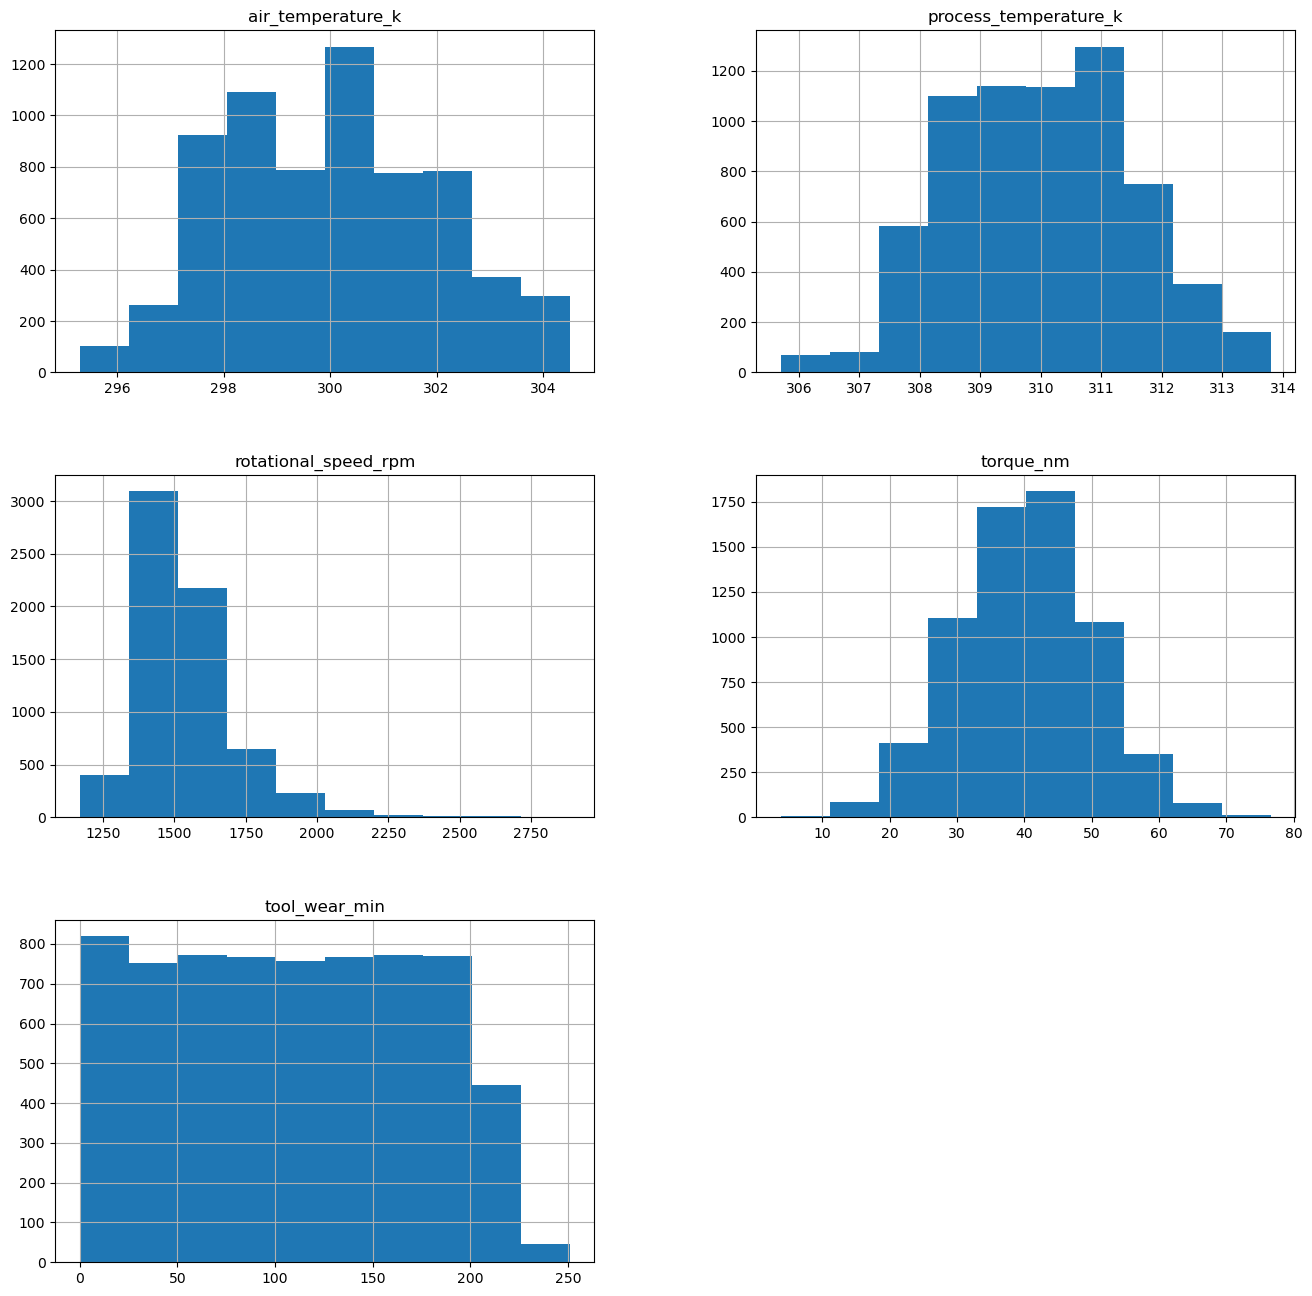

In [19]:
data_cleansed.hist(figsize=(16, 16))

### 3: Correlação de variáveis

#### Este mapa de calor mostra a correlação entre os pares de colunas (variáveis). Ao criar um mapa de calor, nós podemos ver quais variáveis estão positivamente ou negativamente correlacionadas umas com as outras e em que grau. Compreender as correlações entre diferentes variáveis em um conjunto de dados pode ser útil para construir modelos preditivos, pois pode dar uma ideia de quais recursos podem ser mais importantes para prever um determinado alvo. Valores não numéricos são ignorados na composição.

#### Existe uma forte correlação positiva, por exemplo, entre “air_temperature_k” e “process_temperature_k” (0,88). Isso faz sentido, pois uma alta temperatura de processo naturalmente também aquecerá o ar ao redor da máquina. 

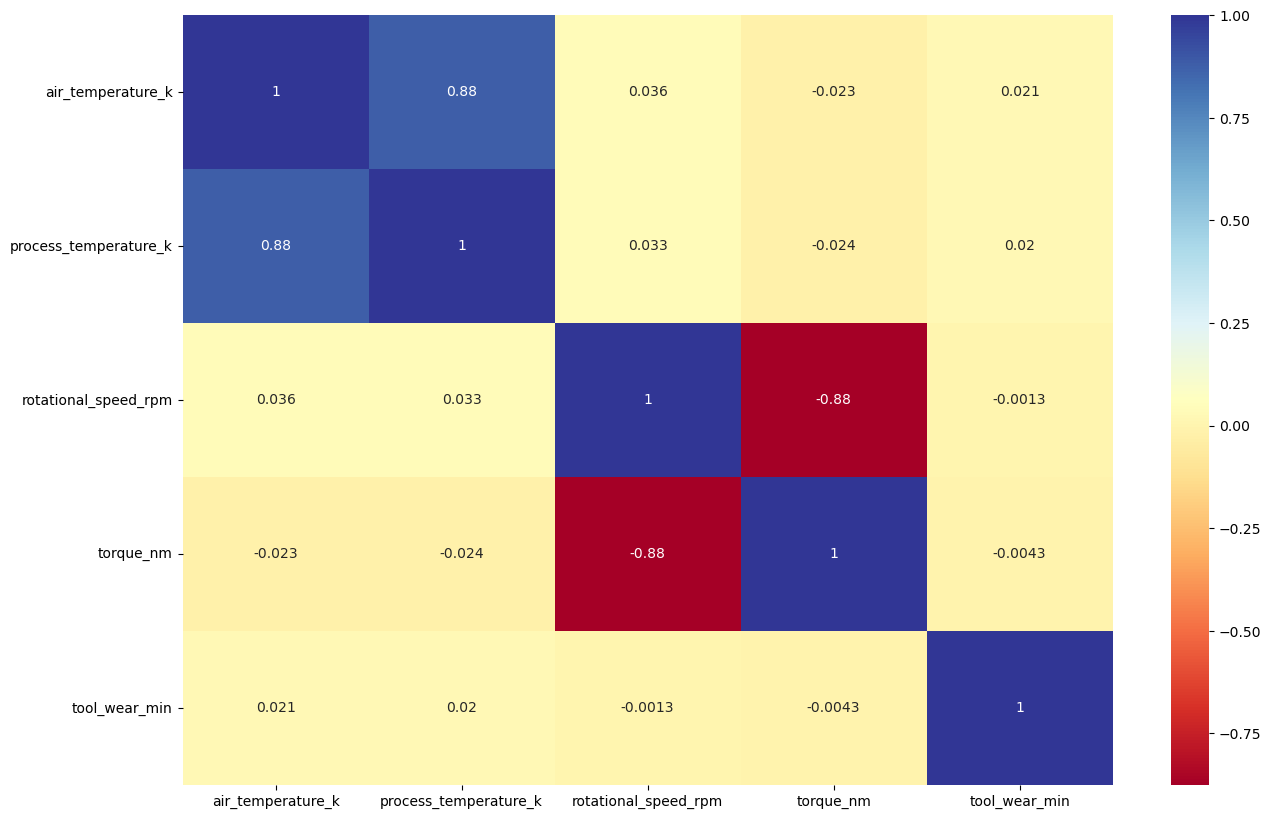

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(data_cleansed.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

### 4: Gráficos de pares

#### Pair Plots, também conhecidos como gráficos de dispersão, são um tipo de gráfico que também mostra a relação entre duas variáveis, mas com a variável alvo aplicada nas relações. Os gráficos de pares revelam padrões em nossos recursos que podem ajudar  nas previsões de nosso modelo. Por exemplo, vemos que as 'Power Failures'  tendem a ser correlacionadas com valores de torque que estão próximos do máximo ou mínimo.

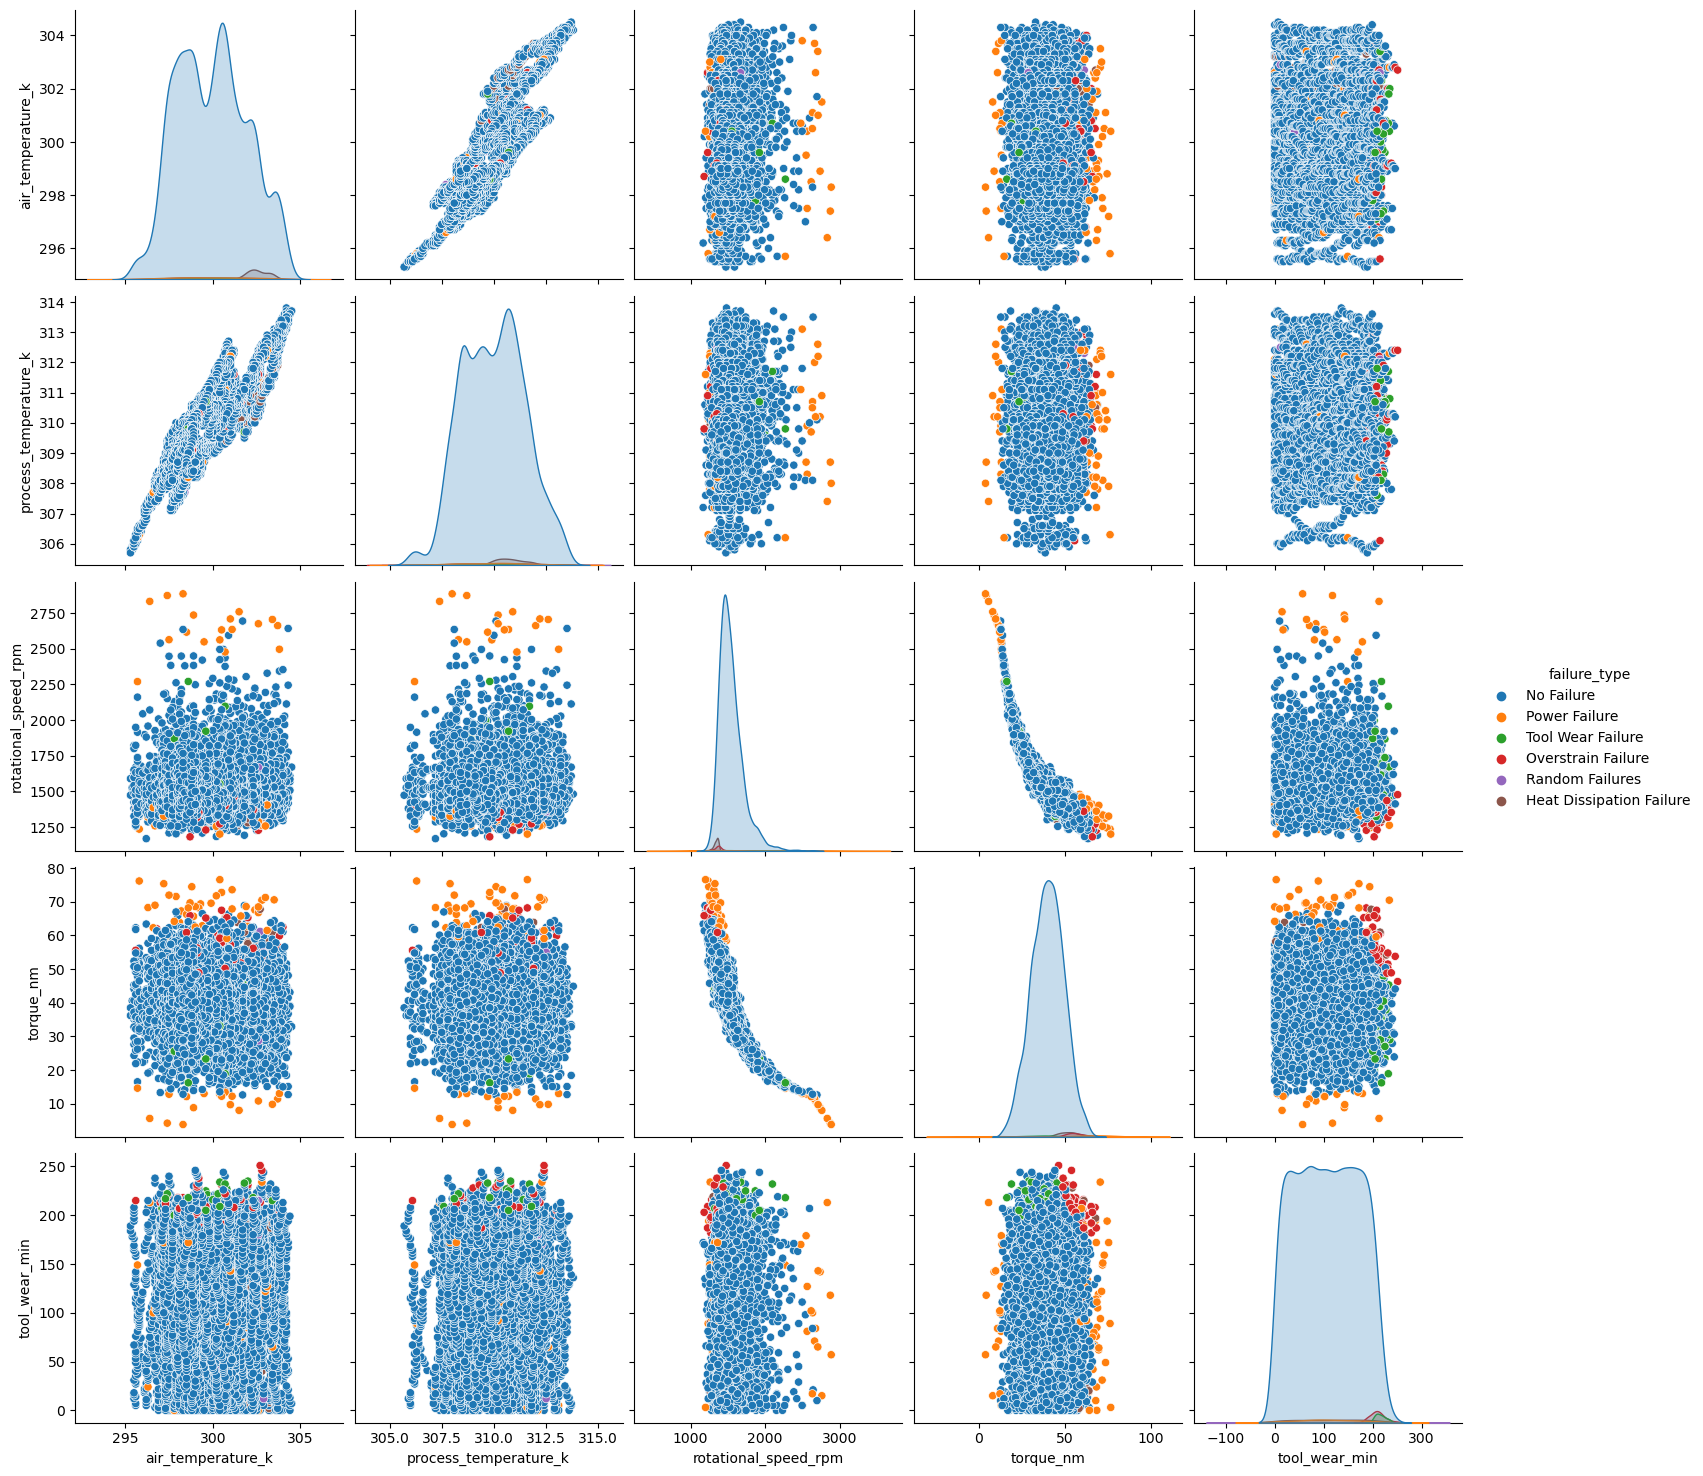

In [11]:
sns.pairplot(data_cleansed, height=3, hue=target_variable)

### 5: Boxplots

#### Os gráficos Boxplots também são uma ferramenta visualização útil para entender a distribuição de valores em um conjunto de dados. Eles mostram os valores mínimo, primeiro quartil, mediana, terceiro quartil e máximo para cada cada tipo de falha em relação a variável selecionada. Será impresso um gráfico individual para cada variável de caracterização para um melhor entendimento do comportamento das classes de falhas em relação a feature definida.

#### A distribuição de valores no conjunto de dados serve para comparar valores entre categorias. Se os boxplots de uma categoria tendem a ter valores mais altos para uma determinada feature do que os boxplots de outra categoria, pode ser uma indicação de que o recurso está relacionado à variável alvo e pode ser útil para definir focos das previsões.

In [12]:
def create_boxplot(column_name):
    return px.box(data_frame=data_cleansed, y=column_name, color=target_variable, points="all", width=1000)

In [13]:
create_boxplot('air_temperature_k')

In [14]:
create_boxplot('process_temperature_k')

In [15]:
create_boxplot('rotational_speed_rpm')

In [16]:
create_boxplot('torque_nm')

In [17]:
create_boxplot('tool_wear_min')